### =====================================================================
### IMPORTACIÓN GENERAL DE LA INFORMACIÓN.
### =====================================================================

In [28]:
## IMPORTACIÓN GENERAL DE LIBRERIAS Y VISUALIZACIÓN DE DATOS (matplotlib y seaborn)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as DT
import warnings
import descartes
import geopandas as gpd
import json
import requests
import geocoder

# Random Forest.
from sklearn.ensemble import RandomForestRegressor
from shapely.geometry import Point, Polygon
from urllib2 import urlopen

# XGBoost.
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso#Loading the dataset

%matplotlib inline
warnings.filterwarnings('ignore')
plt.style.use('default') 
sns.set(style="whitegrid") 
plt.rcParams['figure.figsize'] = (15, 10)

### =====================================================================
### ALGORITMOS DE MACHINE LEARNING:
### =====================================================================

In [38]:
# LECTURAS DE CSV YA PROCESADOS. 
train = pd.read_csv('DATA/train.csv') # trainProcesado_precio_v2.csv # train.csv
test = pd.read_csv('DATA/test.csv') # testProcesado_v2.csv # test.csv

In [39]:
train = train.drop('id', axis = 1)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 79 columns):
antiguedad                       240000 non-null float64
habitaciones                     240000 non-null float64
garages                          240000 non-null float64
banos                            240000 non-null float64
metroscubiertos                  240000 non-null float64
metrostotales                    240000 non-null float64
gimnasio                         240000 non-null float64
usosmultiples                    240000 non-null float64
piscina                          240000 non-null float64
escuelascercanas                 240000 non-null float64
centroscomercialescercanos       240000 non-null float64
precio                           240000 non-null float64
excelente                        240000 non-null int64
vigilancia                       240000 non-null int64
esquina                          240000 non-null int64
remodelada                       240000 

In [40]:
test = test.drop('id', axis = 1)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 78 columns):
antiguedad                       60000 non-null float64
habitaciones                     60000 non-null float64
garages                          60000 non-null float64
banos                            60000 non-null float64
metroscubiertos                  60000 non-null float64
metrostotales                    60000 non-null float64
gimnasio                         60000 non-null float64
usosmultiples                    60000 non-null float64
piscina                          60000 non-null float64
escuelascercanas                 60000 non-null float64
centroscomercialescercanos       60000 non-null float64
excelente                        60000 non-null int64
vigilancia                       60000 non-null int64
esquina                          60000 non-null int64
remodelada                       60000 non-null int64
lujo                             60000 non-null int64
antig

In [41]:
#train = train[[c for c in train if c not in ['HOSPEDAJE', 'GARAGE']] + ['HOSPEDAJE', 'GARAGE']]

In [42]:
# Segmentamos una parte para entrenar y constatar.
# testX = train.loc[train['2016'] == 1]
# trainX = train.loc[train['2016'] == 0]

In [43]:
# Label a predecir.
# testY = np.array(train_2016['precio'])
# testX = testX.drop('precio', axis = 1)

In [44]:
# Resto de los labels.
Y = np.array(train['precio'])
X = train.drop('precio', axis = 1)

In [47]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=42)

### =====================================================================
### XGBoost.
### =====================================================================

Best alpha using built-in LassoCV: 3030488928.212157
Best score using built-in LassoCV: 0.656786
Lasso picked 2 variables and eliminated the other 76 variables


Text(0.5,1,'Feature importance using Lasso Model')

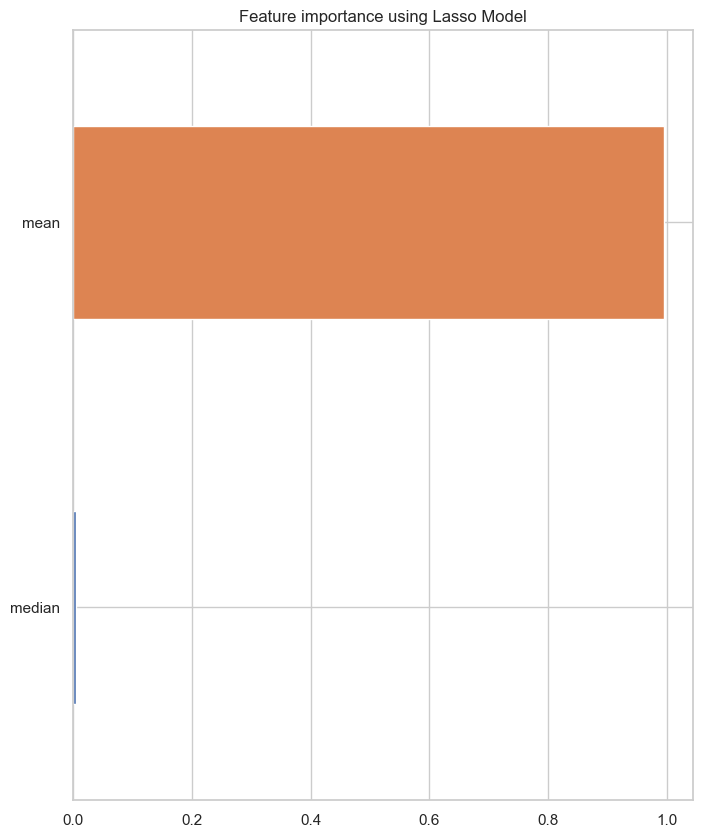

In [46]:
reg = LassoCV()
reg.fit(trainX, trainY)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(trainX,trainY))
coef = pd.Series(reg.coef_, index = trainX.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef[coef != 0].sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [48]:
#xg_reg.fit(trainX,trainY)

In [49]:
y_pred = reg.predict(testX)
# Calculamos el error absoluto.
errors = abs(y_pred - testY)
# Imprimimos el error.
print('Error:', round(np.mean(errors), 2), 'grados.')

('Error:', 722085.34, 'grados.')


In [50]:
# Calculamos el porcentaje de error.
mape = 100 * (errors / testY)
# Calculate la precisión.
accuracy = 100 - np.mean(mape)
print('Precision:', round(accuracy, 2), '%.')

('Precision:', 55.49, '%.')


In [52]:
prediccion = reg.predict(test)

In [53]:
## =================================================================================================
## ARMAMOS EN BASE A LA PREDICCIÓN QUE TENEMOS UN CSV PARA SUBIR A KAGGLE CON EL FORMATO INDICADO!
## =================================================================================================
submission = pd.DataFrame({ 'id': test['id'], 'target': prediccion })
submission.to_csv("SUBMITS/007_G34_Lasso.csv", index=False)

KeyError: 'id'